Training data shape: (114, 1500)


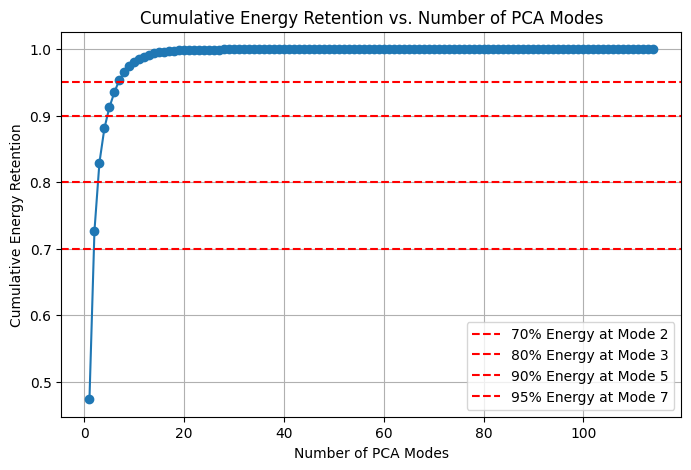

To retain 70% of energy, we need 2 PCA modes.
To retain 80% of energy, we need 3 PCA modes.
To retain 90% of energy, we need 5 PCA modes.
To retain 95% of energy, we need 7 PCA modes.
Training data shape: (114, 1500)


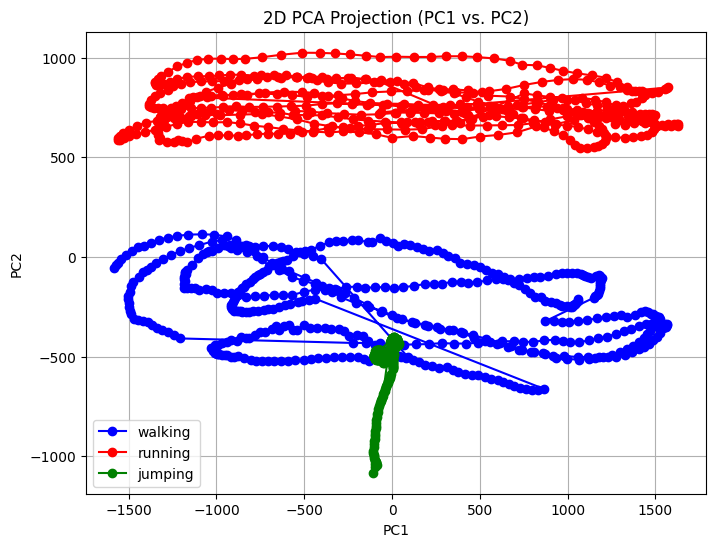

Training data shape: (114, 1500)


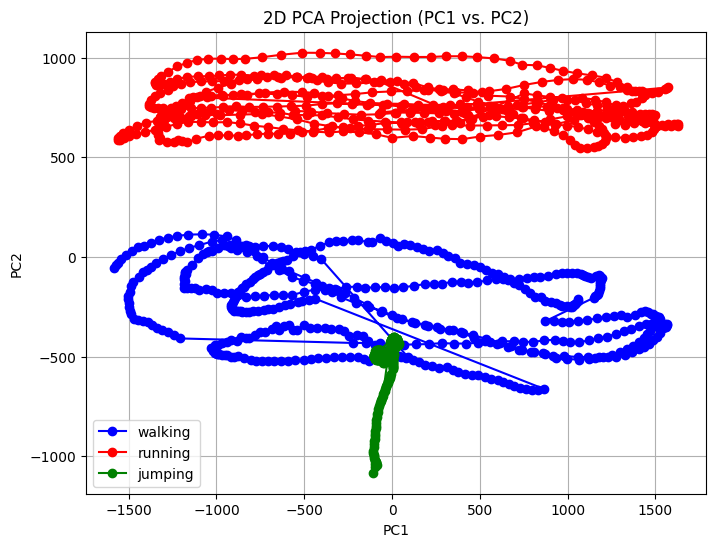

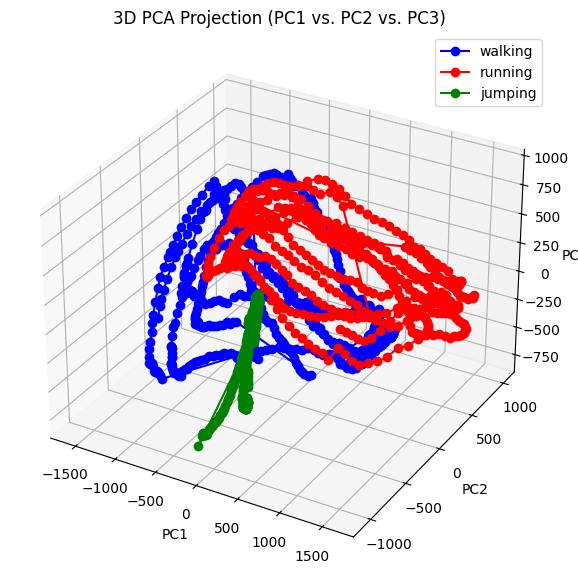

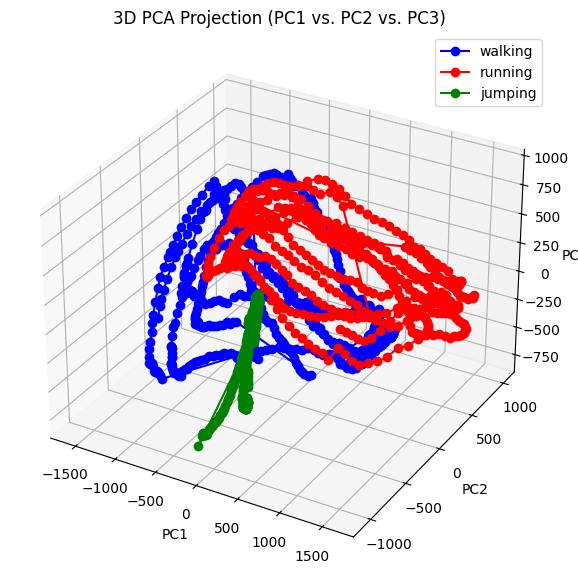

Training data shape: (114, 1500)
Ground truth labels: [0 2 1 1 2 0 0 1 2 0 2 1 1 2 0]
Centroid of walking in PCA space: [-1370.48023043    43.89095331    90.44775187]
Centroid of jumping in PCA space: [-1380.05295885    46.61793675   100.92728411]
Centroid of running in PCA space: [-1364.98366428    49.70402505   118.92691717]


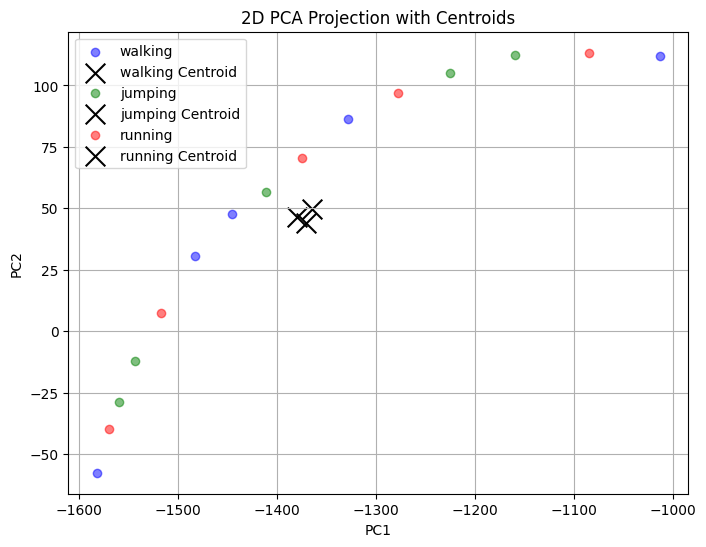

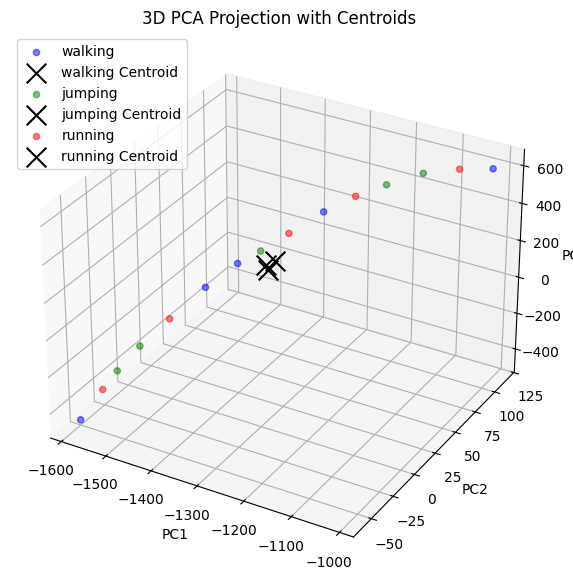

Training data shape: (114, 1500)
Ground truth labels shape: (1500,)
Accuracy for k=2: 0.8813
Accuracy for k=3: 0.7560
Accuracy for k=4: 0.7300
Accuracy for k=5: 0.7507
Accuracy for k=6: 0.7260
Accuracy for k=7: 0.8707
Accuracy for k=8: 0.8753
Accuracy for k=9: 0.8787
Accuracy for k=10: 0.8880


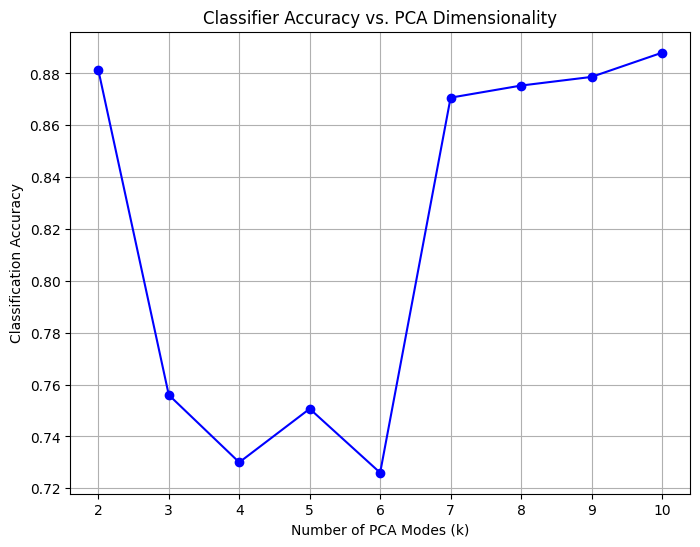

Test data shape: (114, 300)
Ground truth test labels shape: (300,)
Test Accuracy with k=10: 0.9433
Train Accuracy: 0.8880
Test Accuracy: 0.9433


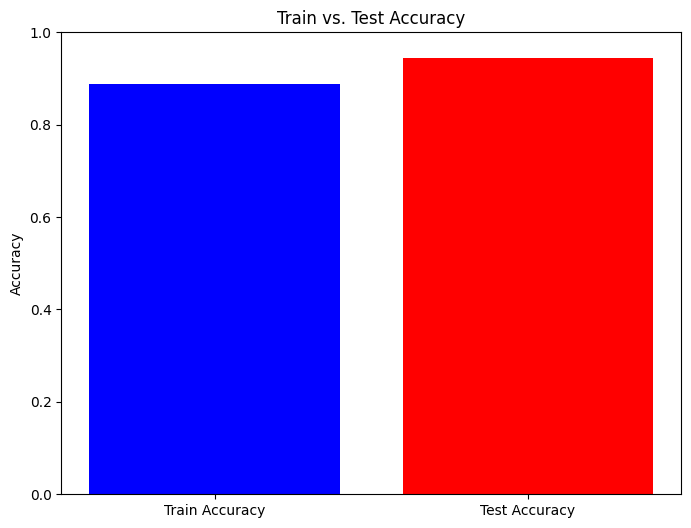

KNN Test Accuracy with k=10: 0.9967
Centroid Classifier Test Accuracy: 0.9433


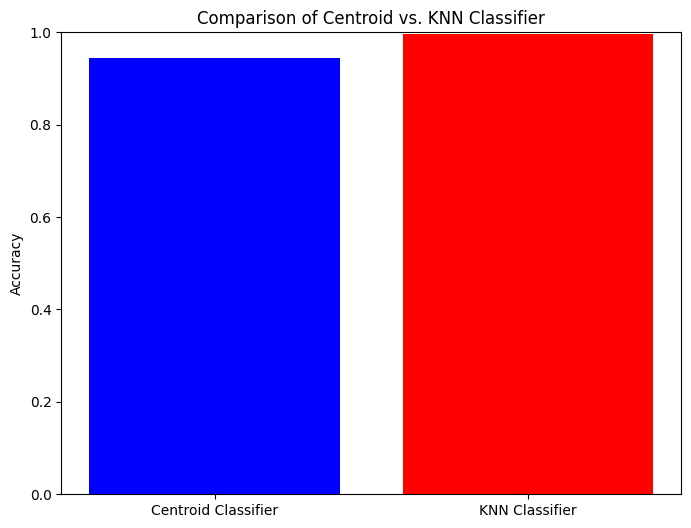

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import glob

# ---------------------------
# Step 1: Load Training Data
# ---------------------------
train_folder = "/Users/zhangchengmai/Desktop/uw/amath482/hw2/hw2data/train/"  
 
#Task 1

# Load all training .npy files
train_files = glob.glob(train_folder + "*.npy")  # Get all .npy files
X_train_list = [np.load(file) for file in train_files]  
X_train = np.concatenate(X_train_list, axis=1)  # Stack all data into a single matrix

print(f"Training data shape: {X_train.shape}")  # (features, time steps)

# --------------------------------
# Step 2: Apply PCA to Training Data
# --------------------------------
# Mean-centering the data
X_train_mean = np.mean(X_train, axis=1, keepdims=True)
X_train_centered = X_train - X_train_mean

# Compute PCA
pca = PCA()
pca.fit(X_train_centered.T)  # Transpose so time steps are treated as samples

# Compute explained variance ratio (energy retention)
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# --------------------------------
# Step 3: Compute Energy Retention Thresholds
# --------------------------------
energy_levels = [0.7, 0.8, 0.9, 0.95]
modes_required = {level: np.argmax(explained_variance_ratio >= level) + 1 for level in energy_levels}

# --------------------------------
# Step 4: Plot Energy Retention
# --------------------------------
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
for level, mode in modes_required.items():
    plt.axhline(y=level, color='r', linestyle='--', label=f'{int(level * 100)}% Energy at Mode {mode}')
plt.xlabel('Number of PCA Modes')
plt.ylabel('Cumulative Energy Retention')
plt.title('Cumulative Energy Retention vs. Number of PCA Modes')
plt.legend()
plt.grid(True)
plt.show()

# --------------------------------
# Step 5: Print Energy Results
# --------------------------------
for level, mode in modes_required.items():
    print(f"To retain {int(level * 100)}% of energy, we need {mode} PCA modes.")

#Task 2

# Extract activity labels based on file names
labels = [file.split('/')[-1].split('_')[0] for file in train_files]  # Extract movement type
unique_labels = list(set(labels))
colors = {'walking': 'blue', 'running': 'red', 'jumping': 'green'}

print(f"Training data shape: {X_train.shape}")  # (features, time steps)

# --------------------------------
# Step 2: Apply PCA (Full Dimensionality)
# --------------------------------
X_train_mean = np.mean(X_train, axis=1, keepdims=True)
X_train_centered = X_train - X_train_mean  # Mean-centering

pca = PCA(n_components=3)  # Retaining top 3 components
X_train_pca = pca.fit_transform(X_train_centered.T)  # Project into PCA space

# Separate PCA projections by activity
projected_data = {activity: [] for activity in unique_labels}

for i, label in enumerate(labels):
    projected_data[label].append(X_train_pca[i * X_train.shape[1] // len(labels): (i + 1) * X_train.shape[1] // len(labels)])

# Convert lists to arrays
for label in projected_data:
    projected_data[label] = np.vstack(projected_data[label])

# --------------------------------
# Step 3: 2D PCA Projection Plot
# --------------------------------
plt.figure(figsize=(8, 6))
for label, color in colors.items():
    plt.plot(projected_data[label][:, 0], projected_data[label][:, 1], marker='o', linestyle='-', color=color, label=label)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA Projection (PC1 vs. PC2)")
plt.legend()
plt.grid()
plt.show()
# Extract activity labels based on file names
labels = [file.split('/')[-1].split('_')[0] for file in train_files]  # Extract movement type
unique_labels = list(set(labels))
colors = {'walking': 'blue', 'running': 'red', 'jumping': 'green'}

print(f"Training data shape: {X_train.shape}")  # (features, time steps)

# --------------------------------
# Step 2: Apply PCA (Full Dimensionality)
# --------------------------------
X_train_mean = np.mean(X_train, axis=1, keepdims=True)
X_train_centered = X_train - X_train_mean  # Mean-centering

pca = PCA(n_components=3)  # Retaining top 3 components
X_train_pca = pca.fit_transform(X_train_centered.T)  # Project into PCA space

# Separate PCA projections by activity
projected_data = {activity: [] for activity in unique_labels}

for i, label in enumerate(labels):
    projected_data[label].append(X_train_pca[i * X_train.shape[1] // len(labels): (i + 1) * X_train.shape[1] // len(labels)])

# Convert lists to arrays
for label in projected_data:
    projected_data[label] = np.vstack(projected_data[label])

# --------------------------------
# Step 3: 2D PCA Projection Plot
# --------------------------------
plt.figure(figsize=(8, 6))
for label, color in colors.items():
    plt.plot(projected_data[label][:, 0], projected_data[label][:, 1], marker='o', linestyle='-', color=color, label=label)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA Projection (PC1 vs. PC2)")
plt.legend()
plt.grid()
plt.show()

# --------------------------------
# Step 4: 3D PCA Projection Plot
# --------------------------------
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label, color in colors.items():
    ax.plot(projected_data[label][:, 0], projected_data[label][:, 1], projected_data[label][:, 2], marker='o', linestyle='-', color=color, label=label)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Projection (PC1 vs. PC2 vs. PC3)")
ax.legend()
plt.show()
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label, color in colors.items():
    ax.plot(projected_data[label][:, 0], projected_data[label][:, 1], projected_data[label][:, 2], marker='o', linestyle='-', color=color, label=label)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Projection (PC1 vs. PC2 vs. PC3)")
ax.legend()
plt.show()

#task 3
# Assign movement labels
labels = [file.split('/')[-1].split('_')[0] for file in train_files]  # Extract activity type
label_mapping = {'walking': 0, 'jumping': 1, 'running': 2}
y_train = np.array([label_mapping[label] for label in labels])  # Convert to numerical labels

print(f"Training data shape: {X_train.shape}")
print(f"Ground truth labels: {y_train}")

# --------------------------------
# Step 2: Apply PCA (Retain k=3 modes)
# --------------------------------
X_train_mean = np.mean(X_train, axis=1, keepdims=True)
X_train_centered = X_train - X_train_mean

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_centered.T)  # Project into PCA space

# --------------------------------
# Step 3: Compute Centroids for Each Movement Type
# --------------------------------
centroids = {}
for movement in label_mapping:
    movement_idx = np.where(y_train == label_mapping[movement])[0]  # Find indices
    centroids[movement] = np.mean(X_train_pca[movement_idx], axis=0)  # Compute mean

# Print centroids
for movement, centroid in centroids.items():
    print(f"Centroid of {movement} in PCA space: {centroid}")

# --------------------------------
# Step 4: Visualize Centroids in PCA Space
# --------------------------------
colors = {0: 'blue', 1: 'green', 2: 'red'}

# 2D Projection (PC1, PC2)
plt.figure(figsize=(8, 6))
for movement, color in colors.items():
    movement_idx = np.where(y_train == movement)[0]
    plt.scatter(X_train_pca[movement_idx, 0], X_train_pca[movement_idx, 1], color=color, alpha=0.5, label=list(label_mapping.keys())[movement])
    plt.scatter(centroids[list(label_mapping.keys())[movement]][0], centroids[list(label_mapping.keys())[movement]][1], color='black', marker='x', s=200, label=f"{list(label_mapping.keys())[movement]} Centroid")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA Projection with Centroids")
plt.legend()
plt.grid()
plt.show()

# 3D Projection (PC1, PC2, PC3)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for movement, color in colors.items():
    movement_idx = np.where(y_train == movement)[0]
    ax.scatter(X_train_pca[movement_idx, 0], X_train_pca[movement_idx, 1], X_train_pca[movement_idx, 2], color=color, alpha=0.5, label=list(label_mapping.keys())[movement])
    ax.scatter(centroids[list(label_mapping.keys())[movement]][0], centroids[list(label_mapping.keys())[movement]][1], centroids[list(label_mapping.keys())[movement]][2], color='black', marker='x', s=200, label=f"{list(label_mapping.keys())[movement]} Centroid")

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Projection with Centroids")
ax.legend()
plt.show()

#task4 

# Load all training .npy files
train_files = glob.glob(train_folder + "*.npy")
X_train_list = [np.load(file) for file in train_files]
X_train = np.concatenate(X_train_list, axis=1)  # Shape: (features, total_samples)

# Fix: Assign movement labels for each individual sample, not just per file
labels = [file.split('/')[-1].split('_')[0] for file in train_files]  # Extract activity type
label_mapping = {'walking': 0, 'jumping': 1, 'running': 2}

# Fix: Generate correct length ground truth labels
y_train = np.concatenate([np.full(X.shape[1], label_mapping[label]) for X, label in zip(X_train_list, labels)])

print(f"Training data shape: {X_train.shape}")  # Should match y_train length
print(f"Ground truth labels shape: {y_train.shape}")  # Should match X_train.shape[1]

# --------------------------------
# Step 2: Train Classifier for Multiple k-PCA Values
# --------------------------------
k_values = range(2, 11)  # Try PCA truncations from k=2 to k=10
accuracies = []  # Store accuracy for each k

for k in k_values:
    # Apply PCA with k modes
    X_train_mean = np.mean(X_train, axis=1, keepdims=True)
    X_train_centered = X_train - X_train_mean
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train_centered.T)  # Project into PCA space

    # Compute centroids
    centroids = {}
    for movement in label_mapping:
        movement_idx = np.where(y_train == label_mapping[movement])[0]  # Find indices
        centroids[movement] = np.mean(X_train_pca[movement_idx], axis=0)  # Compute mean

    # Assign trained labels based on nearest centroid
    trained_labels = []
    for sample in X_train_pca:
        distances = [np.linalg.norm(sample - centroids[movement]) for movement in label_mapping]
        predicted_label = np.argmin(distances)  # Classify based on nearest centroid
        trained_labels.append(predicted_label)

    trained_labels = np.array(trained_labels)

    # Compute accuracy
    acc = accuracy_score(y_train, trained_labels)
    accuracies.append(acc)
    print(f"Accuracy for k={k}: {acc:.4f}")

# --------------------------------
# Step 3: Plot Accuracy vs. k
# --------------------------------
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.xlabel("Number of PCA Modes (k)")
plt.ylabel("Classification Accuracy")
plt.title("Classifier Accuracy vs. PCA Dimensionality")
plt.grid()
plt.show()

#task 5
# Step 1: Load Test Data
# --------------------------------
test_folder = "/Users/zhangchengmai/Desktop/uw/amath482/hw2/hw2data/test/"  

# Load all test .npy files
test_files = glob.glob(test_folder + "*.npy")
X_test_list = [np.load(file) for file in test_files]
X_test = np.concatenate(X_test_list, axis=1)  # Shape: (features, total_test_samples)

# Assign ground truth labels for test data
test_labels = [file.split('/')[-1].split('_')[0] for file in test_files]  # Extract movement type
label_mapping = {'walking': 0, 'jumping': 1, 'running': 2}

# Generate ground truth test labels (same length as X_test)
y_test = np.concatenate([np.full(X.shape[1], label_mapping[label]) for X, label in zip(X_test_list, test_labels)])

print(f"Test data shape: {X_test.shape}")
print(f"Ground truth test labels shape: {y_test.shape}")

# --------------------------------
# Step 2: Apply PCA Transformation (Using Trained Model)
# --------------------------------
best_k = 10  # Use best k from Task 4
X_test_mean = np.mean(X_test, axis=1, keepdims=True)
X_test_centered = X_test - X_test_mean

pca = PCA(n_components=best_k)
X_train_pca = pca.fit_transform(X_train_centered.T)  # Train PCA on X_train
X_test_pca = pca.transform(X_test_centered.T)  # Apply same PCA transformation to X_test

# Compute centroids from training data
centroids = {}
for movement in label_mapping:
    movement_idx = np.where(y_train == label_mapping[movement])[0]
    centroids[movement] = np.mean(X_train_pca[movement_idx], axis=0)  # Compute mean in PCA space

# --------------------------------
# Step 3: Classify Test Data Using Nearest Centroid
# --------------------------------
test_predictions = []
for sample in X_test_pca:
    distances = [np.linalg.norm(sample - centroids[movement]) for movement in label_mapping]
    predicted_label = np.argmin(distances)  # Assign nearest centroid's label
    test_predictions.append(predicted_label)

test_predictions = np.array(test_predictions)

# --------------------------------
# Step 4: Evaluate Test Accuracy
# --------------------------------
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy with k={best_k}: {test_accuracy:.4f}")

# Compare Train vs Test Accuracy
train_accuracy = accuracy_score(y_train, trained_labels)  # From Task 4
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# --------------------------------
# Step 5: Visualize Results
# --------------------------------
plt.figure(figsize=(8, 6))
plt.bar(["Train Accuracy", "Test Accuracy"], [train_accuracy, test_accuracy], color=['blue', 'red'])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Train vs. Test Accuracy")
plt.show()

#task 6
# Set the best PCA dimension from Task 5
best_k = 10  

# Recompute PCA (using the same training set)
pca = PCA(n_components=best_k)
X_train_pca = pca.fit_transform(X_train_centered.T)  # Train PCA
X_test_pca = pca.transform(X_test_centered.T)  # Apply PCA to test data

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # 5 neighbors (tunable)
knn.fit(X_train_pca, y_train)

# Predict on test data
knn_predictions = knn.predict(X_test_pca)

# Evaluate accuracy
knn_test_accuracy = accuracy_score(y_test, knn_predictions)

print(f"KNN Test Accuracy with k={best_k}: {knn_test_accuracy:.4f}")

# Compare with centroid-based classifier
print(f"Centroid Classifier Test Accuracy: {test_accuracy:.4f}")

plt.figure(figsize=(8, 6))
plt.bar(["Centroid Classifier", "KNN Classifier"], [test_accuracy, knn_test_accuracy], color=['blue', 'red'])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Comparison of Centroid vs. KNN Classifier")
plt.show()